In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Declare a mesh
l = 0.1
N = 100
L = (N-1)*l
x = np.linspace(0, L, N)
# plt.figure(figsize=(12,10))
# plt.plot(x, np.ones(N),'-o')

In [2]:
def cal_force(temp):
    return -(2.*temp - 3.*alpha*(temp**2) + 0.4*(temp**3))

In [3]:
def cal_potential_energy(chain):
    re = 0.0
    n = chain.size
    for i in range(0, n-1):
        temp = chain[i] - chain[i+1] - l
        re += temp**2 - alpha*(temp**3) + 0.1*(temp**4)
        
    return re

In [4]:
def cal_kinetic_energy(vel):
    results = 0.0
    for vi in vel:
        results += 0.5*m*(vi**2)
    return results

In [5]:
def cal_total_energy(chain, vel):
    return cal_potential_energy(chain) + cal_kinetic_energy(vel)

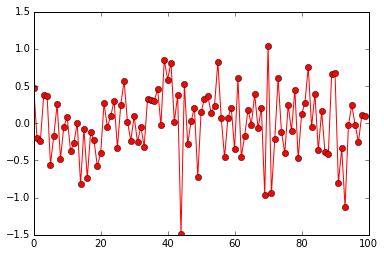

In [6]:
# Now we need to verlet every particle:
T = 1000
dt = 0.1
num_iter = int(T/dt)
t = 0.0
m = 1.0
alpha = 0.5
gamma = 0.1
kB = 1.0
Temp = 1.0 # Kelvin

# Random initilise of v
# Make sure they have zero mean
v = 0.5*np.random.normal(0, 1.0, N)
v = v - np.mean(v)
plt.plot(v,'-ro')

In [7]:
print cal_total_energy(x, v)
print cal_kinetic_energy(v)
print cal_potential_energy(x)

14.4949316432
10.1230916432
4.37184


In [8]:
a = np.zeros(N)
net_length = []
potential_energy = []
kinetic_energy = []
total_energy = []
v_mean = []

for it in range(num_iter):
    a = np.zeros(N)
    for i in range(N):
        if i==0:
            a[i] = (1.0/m)*cal_force(x[i] - x[i+1] - l)
        elif i==N-1:
            a[i] = -(1.0/m)*cal_force(x[i-1] - x[i] - l)
        else:
            a[i] = (1.0/m)*(cal_force(x[i] - x[i+1] - l) - cal_force(x[i-1] - x[i] - l))
    if it==0:    
        # Create a storage
        x_store = x.copy()
        # Euler at the very start
        x = x + v*dt + 0.5*a*dt*dt
        v = v + a*dt
    else:
        # Create a storage
        x_store = np.vstack((x_store, x))    
    
        # Updated velvet scheme
        vhalf = v + a*dt*0.5
        xhalf = x + vhalf*dt*0.5
        vhathalf = np.exp(-gamma*dt)*vhalf + np.sqrt(kB*Temp*(1-np.exp(-2.0*gamma*dt)))*np.random.normal(0, 1.0, N)
        x = xhalf + vhathalf*dt*0.5

        # Here you need to update acceleration
        for i in range(N):
            if i==0:
                a[i] = (1.0/m)*cal_force(x[i] - x[i+1] - l)
            elif i==N-1:
                a[i] = -(1.0/m)*cal_force(x[i-1] - x[i] - l)
            else:
                a[i] = (1.0/m)*(cal_force(x[i] - x[i+1] - l) - cal_force(x[i-1] - x[i] - l))

        # And now you update velocity, using the new alpha
        v = vhathalf + a*dt*0.5

    # Create a storage
    net_length.append((np.max(x)-np.min(x))/L)
    potential_energy.append(cal_potential_energy(x))
    kinetic_energy.append(cal_kinetic_energy(v))
    total_energy.append(cal_total_energy(x, v))

4.72916678098


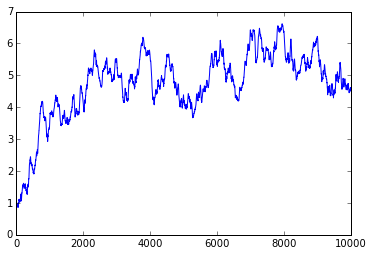

In [9]:
plt.plot(net_length)
print np.mean(net_length)

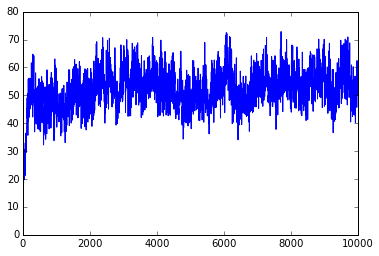

In [10]:
plt.plot(potential_energy)

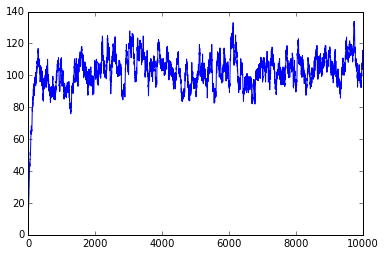

In [11]:
plt.plot(total_energy)

50.2174260456


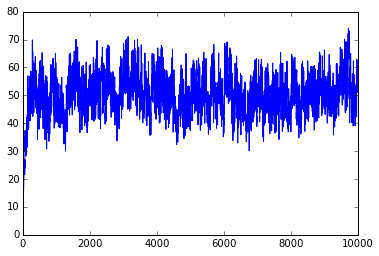

In [14]:
plt.plot(kinetic_energy)
print np.mean(kinetic_energy)

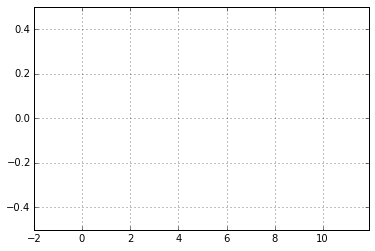

In [13]:
from JSAnimation.IPython_display import display_animation
import matplotlib.animation as animation

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2.0, L+2.0), ylim=(-0.5, 0.5))
ax.grid()
scat = ax.scatter([], [], s=50)
line, = ax.plot([], [], lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
color_data = np.linspace(0, N, N)

def animate(i, color_data, scat, line):
    x = x_store[i]
    y = np.zeros(x.size)
    line.set_data(x, y)
    array = np.vstack((x, y))
    scat.set_offsets(array.transpose())
    scat.set_array(color_data)
    time_text.set_text(time_template%(i*dt))
    return line, scat, time_text

def init():
    line.set_data([], [])
    scat = ax.scatter([], [], s=50)
    time_text.set_text('')
    return line, scat, time_text

anim = animation.FuncAnimation(fig, animate, frames=xrange(num_iter),
                              fargs=(color_data, scat, line), blit=False, init_func=init)
    
# Call animation function to display the animation
# display_animation(anim)